A2. Calculate MSE, RMSE, MAPE and R2 scores for the price prediction exercise done in Lab 03. 
Analyse the results.

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def load_data(file_path, sheet_name, columns):
    df = pd.read_excel(file_path, sheet_name=sheet_name, usecols=columns)
    return df

def split_data(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    mape = (mae / y_test.abs()).mean() * 100
    r2 = r2_score(y_test, predictions)
    return mse, rmse, mae, mape, r2

# Main program
if __name__ == "__main__":
    # Load data
    file_path = r"C:\Users\garik\Downloads\Lab Session1 Data.xlsx"
    sheet_name = "Purchase data"
    columns = 'B:E'
    df = load_data(file_path, sheet_name, columns)

    # Separate features and target
    X = df.iloc[:, :-2]
    y = df['Payment (Rs)']

    # Split the data
    X_train, X_test, y_train, y_test = split_data(X, y)

    # Train the model
    model = train_model(X_train, y_train)

    # Evaluate the model
    mse, rmse, mae, mape, r2 = evaluate_model(model, X_test, y_test)

    # Print evaluation metrics
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
    print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 1847.6133919124932
Root Mean Squared Error (RMSE): 42.98387362619257
Mean Absolute Error (MAE): 33.108417805200546
Mean Absolute Percentage Error (MAPE): 16.913376251838397%
R^2 Score: 0.628265501350537


A3. Generate 20 data points (training set data) consisting of 2 features (X & Y) whose values vary 
randomly between 1 & 10. Based on the values, assign these 20 points to 2 different classes (class0 -
Blue & class1 – Red). Make a scatter plot of the training data and color the points as per their class 
color. Observe the plot.

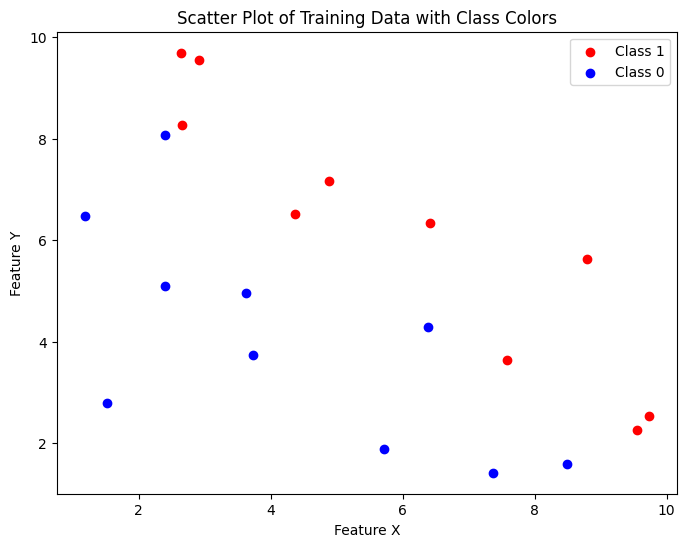

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def generate_data():
    #Generate random data for X and Y.
    np.random.seed(42)
    X = np.random.uniform(1, 10, 20)
    Y = np.random.uniform(1, 10, 20)
    return X, Y

def calculate_threshold(X, Y):
    #Calculate the threshold as the median of the sum of X and Y.
    threshold = np.median(X + Y)
    return threshold

def classify_data(X, Y, threshold):
    classes = np.where(X + Y > threshold, 1, 0)
    return classes

def plot_data(X, Y, classes):
    #Plot the data points with different colors for each class.
    plt.figure(figsize=(8, 6))
    for i in range(len(classes)):
        if classes[i] == 0:
            plt.scatter(X[i], Y[i], color='blue', label='Class 0' if 'Class 0' not in plt.gca().get_legend_handles_labels()[1] else "")
        else:
            plt.scatter(X[i], Y[i], color='red', label='Class 1' if 'Class 1' not in plt.gca().get_legend_handles_labels()[1] else "")
    plt.title('Scatter Plot of Training Data with Class Colors')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    X, Y = generate_data()
    threshold = calculate_threshold(X, Y)
    classes = classify_data(X, Y, threshold)
    plot_data(X, Y, classes)

A4. Generate test set data with values of X & Y varying between 0 and 10 with increments of 0.1. 
This creates a test set of about 10,000 points. Classify these points with above training data using 
kNN classifier (k = 3). Make a scatter plot of the test data output with test points colored as per their 
predicted class colors (all points predicted class0 are labeled blue color). Observe the color spread 
and class boundary lines in the feature space

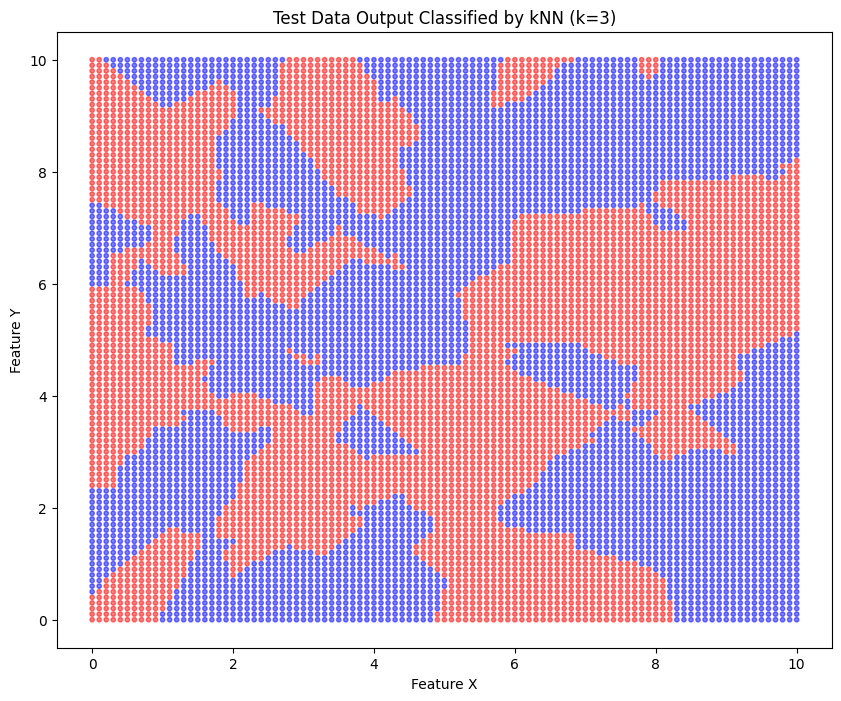

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def generate_meshgrid(start, stop, step):
    x_values = np.arange(start, stop + step, step)
    y_values = np.arange(start, stop + step, step)
    xx, yy = np.meshgrid(x_values, y_values)
    return xx, yy

def create_test_points(xx, yy):
    test_points = np.c_[xx.ravel(), yy.ravel()]
    return test_points

def plot_predicted_classes(test_points, predicted_classes):
    plt.figure(figsize=(10, 8))
    colors = np.where(predicted_classes == 0, 'blue', 'red')  
    plt.scatter(test_points[:, 0], test_points[:, 1], color=colors, s=10, alpha=0.5)  
    plt.title('Test Data Output Classified by kNN (k=3)')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.show()

# Main program
if __name__ == "__main__":
    # Generate meshgrid
    start = 0
    stop = 10.1
    step = 0.1
    xx, yy = generate_meshgrid(start, stop, step)
    
    # Create test points
    test_points = create_test_points(xx, yy)
    
    # Example training data, labels, and kNN classifier
    X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    Y = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
    classes = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
    training_data = np.column_stack((X, Y))
    training_labels = classes
    
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(training_data, training_labels)
    
    # Predict classes for test points
    predicted_classes = knn.predict(test_points)
    
    # Plot predicted classes
    plot_predicted_classes(test_points, predicted_classes)


A5. Repeat A4 exercise for various values of k and observe the change in the class boundary lines.


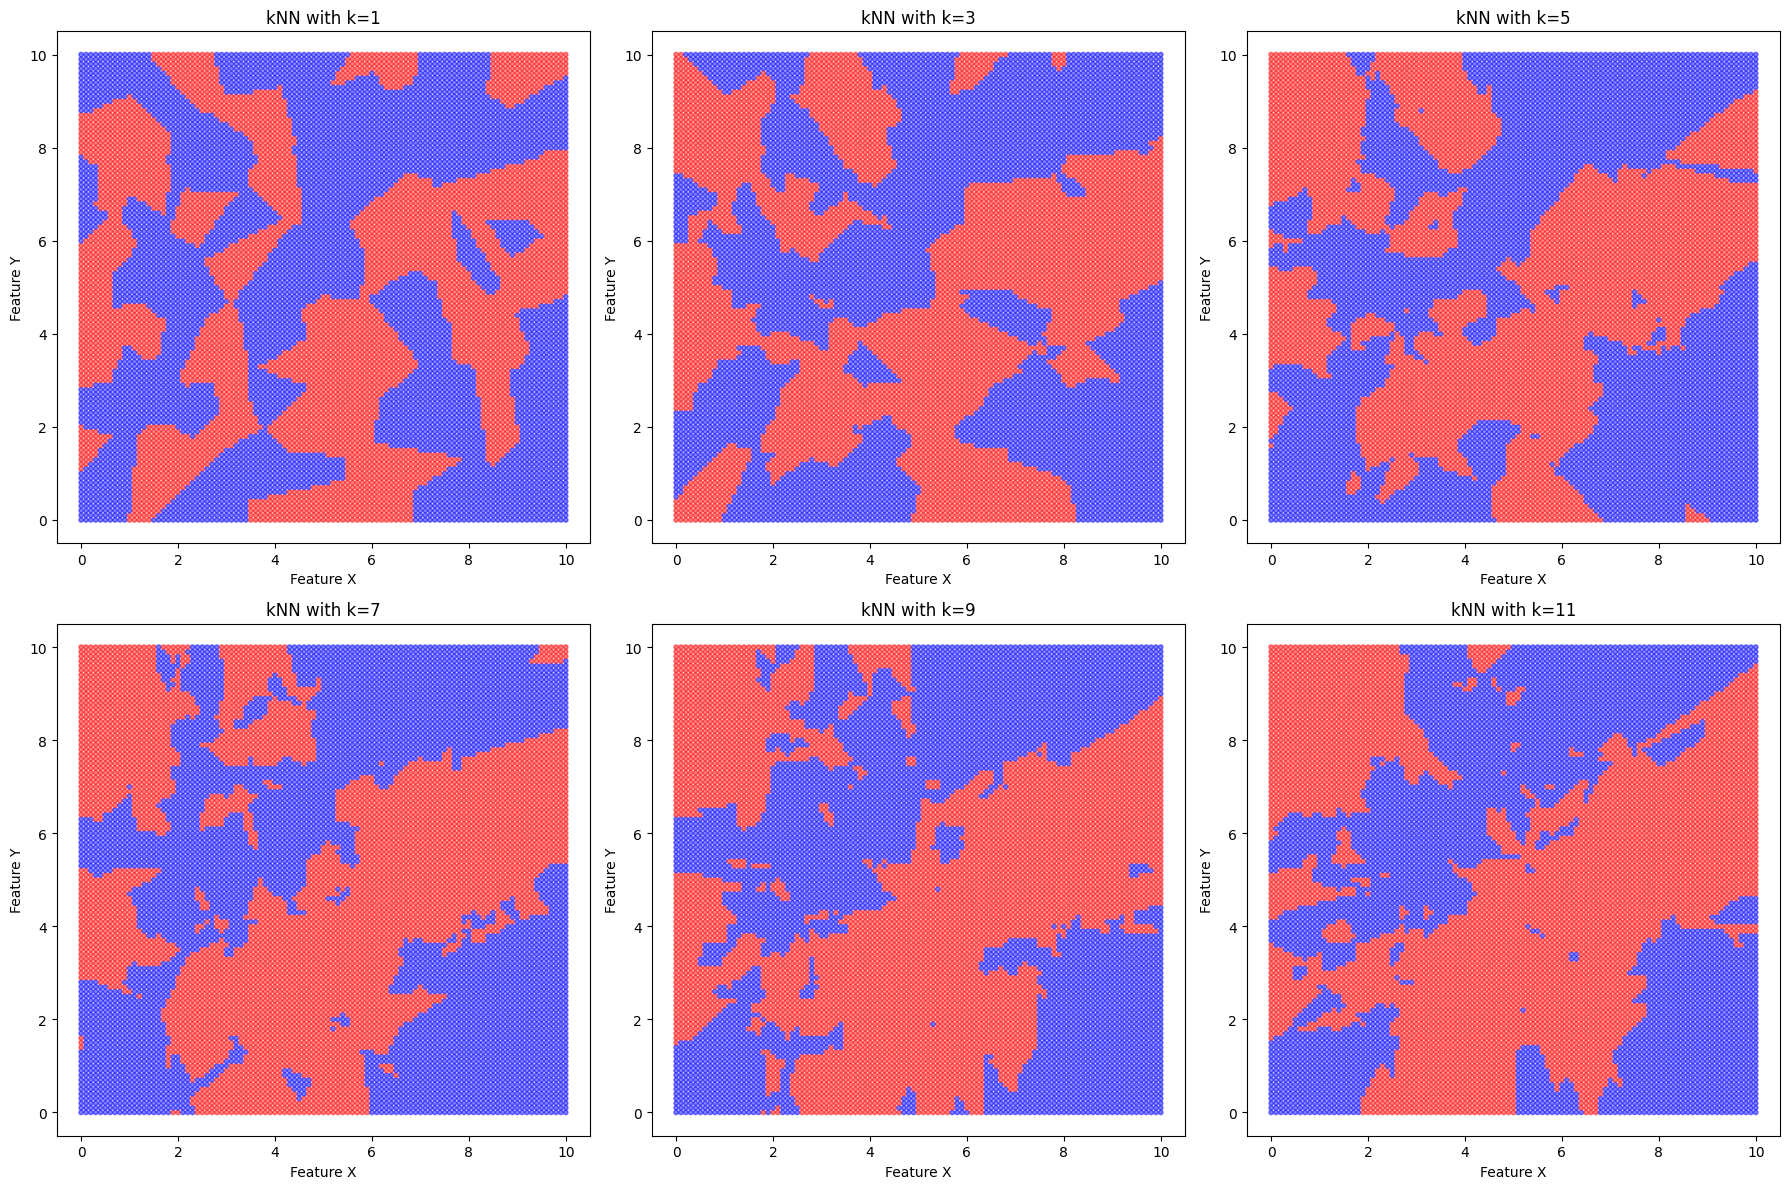

In [14]:
def classify_and_plot_kNN(k_values):
    plt.figure(figsize=(18, 12))
    for i, k in enumerate(k_values, 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(training_data, training_labels)
        predicted_classes = knn.predict(test_points)
        plt.subplot(2, 3, i)
        colors = np.where(predicted_classes==0, 'blue', 'red') 
        plt.scatter(test_points[:, 0], test_points[:, 1], color=colors, s=10, alpha=0.5)  
        plt.title(f'kNN with k={k}')
        plt.xlabel('Feature X')
        plt.ylabel('Feature Y')
    plt.tight_layout()
    plt.show()
k_values = [1, 3, 5, 7, 9, 11]
classify_and_plot_kNN(k_values)

A6. Repeat the exercises A3 to A5 for your project data considering any two features and classes.


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

def load_images(data_dir):
    datagen = ImageDataGenerator(rescale=1./255)
    class_names = sorted(os.listdir(data_dir))[:2]
    generator = datagen.flow_from_directory(
        data_dir,
        classes=class_names,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary',
        shuffle=True
    )
    X, y = next(generator)
    return X, y

def plot_selected_data(features, labels):
    plt.figure(figsize=(8, 6))
    for class_index, color, class_name in zip([0, 1], ['blue', 'red'], ['Academic Art', 'Art Nouveau']):
        class_points = features[labels == class_index]
        plt.scatter(class_points[:, 0], class_points[:, 1], c=color, label=class_name)
    plt.title('Selected Data Points from Academic Art and Art Nouveau')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

def knn_classification(features, labels):
    knn = KNeighborsClassifier(n_neighbors=3)
    # Reshape features to 2D array if needed
    if len(features.shape) > 2:
        features = features.reshape(features.shape[0], -1)
    knn.fit(features, labels)
    return knn

def plot_knn_classification(knn_model, test_data, selected_features, selected_labels):
    # Reshape test data to 2D array if needed
    if len(test_data.shape) > 2:
        test_data = test_data.reshape(test_data.shape[0], -1)
    
    predicted_classes = knn_model.predict(test_data)
    plt.figure(figsize=(10, 8))
    plt.scatter(test_data[:, 0], test_data[:, 1], c=predicted_classes, cmap=plt.cm.coolwarm, alpha=0.2)
    plt.scatter(selected_features[:, 0], selected_features[:, 1], c=selected_labels, cmap=plt.cm.coolwarm, edgecolor='k', s=80, label='Training Data')
    plt.title('kNN Classification (k=3) of Test Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    # Load images from the specified directory
    data_dir = r"D:\SEM-4\PROJECTS\ML\Archive"
    X, y = load_images(data_dir)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Plot selected data points
    filtered_indices = np.where((y_train == 0) | (y_train == 1))
    filtered_features = X_train[filtered_indices[0]][:, :2]
    filtered_labels = y_train[filtered_indices]
    
    # Ensure we don't sample more than the available data
    num_samples = min(20, len(filtered_labels))
    np.random.seed(42)
    selected_indices = np.random.choice(range(len(filtered_labels)), num_samples, replace=False)
    selected_features = filtered_features[selected_indices]
    selected_labels = filtered_labels[selected_indices]
    plot_selected_data(selected_features, selected_labels)
    
    # Train kNN classifier
    knn_model = knn_classification(selected_features, selected_labels)
    
    # Create test data for classification
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    x_values = np.linspace(x_min, x_max, 100)
    y_values = np.linspace(y_min, y_max, 100)
    xx, yy = np.meshgrid(x_values, y_values)
    test_data = np.c_[xx.ravel(), yy.ravel()]
    
    # Plot kNN classification results
    plot_knn_classification(knn_model, test_data, selected_features, selected_labels)


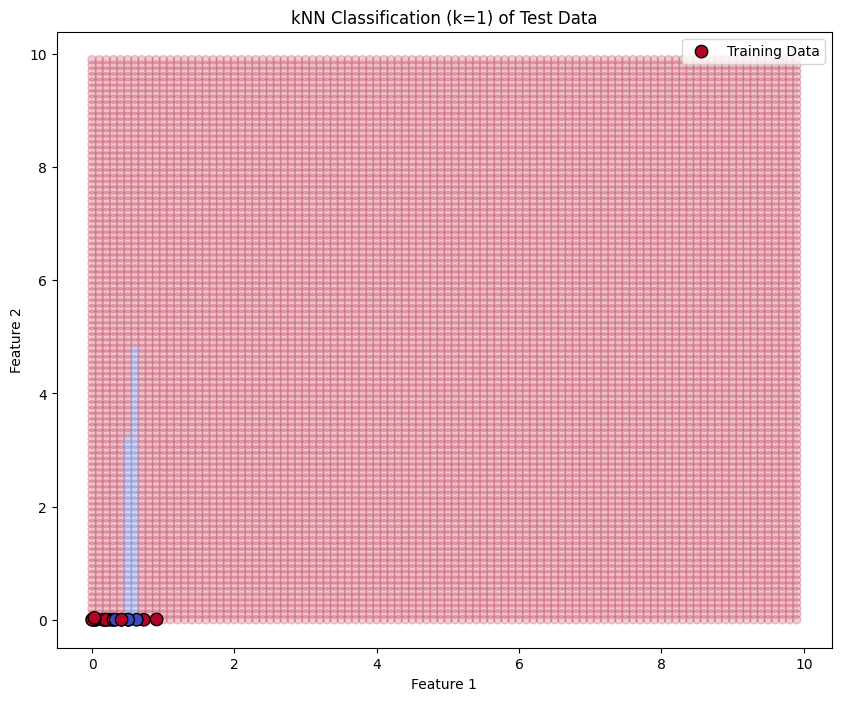

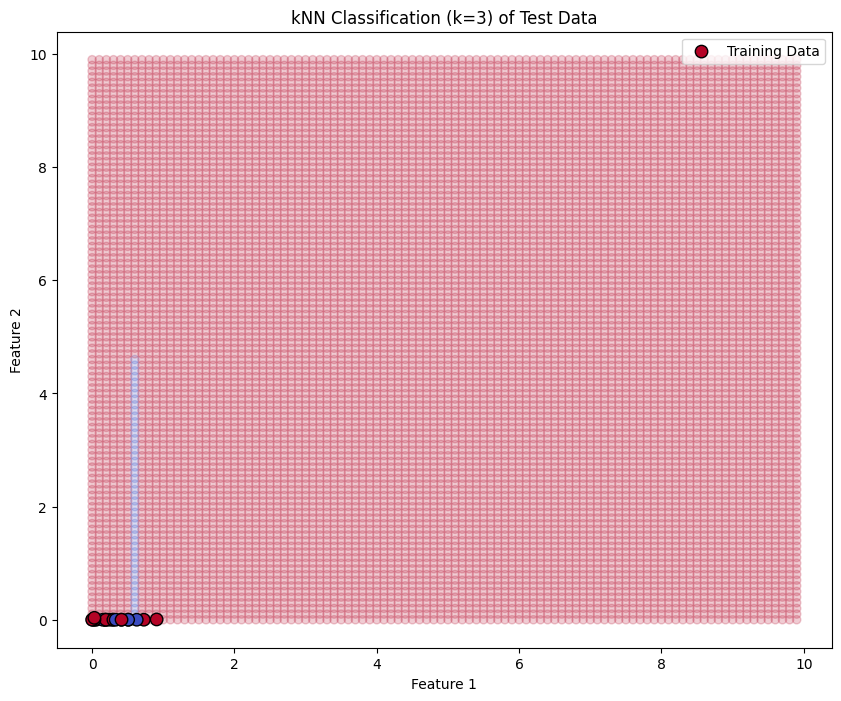

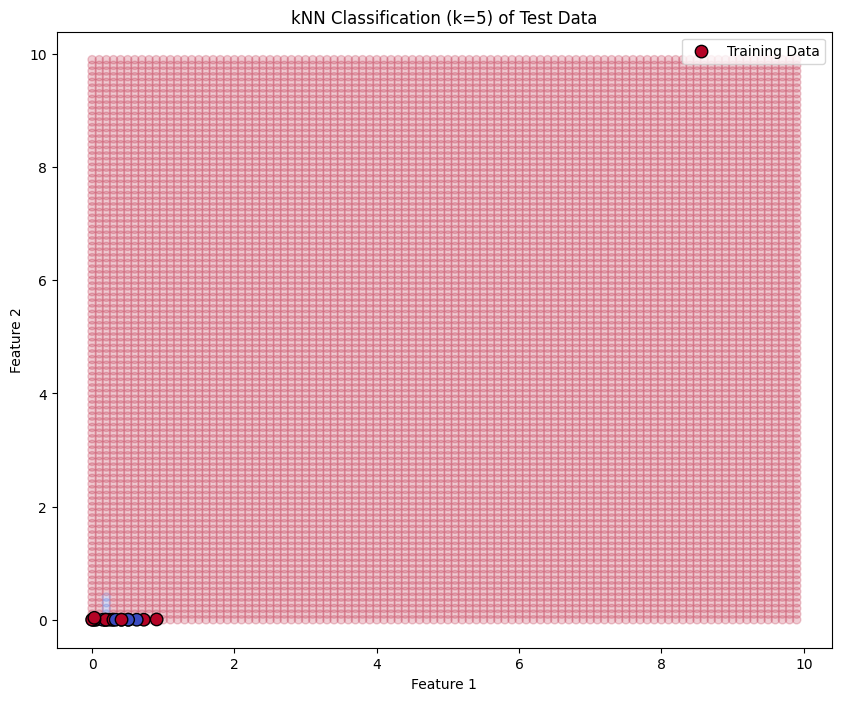

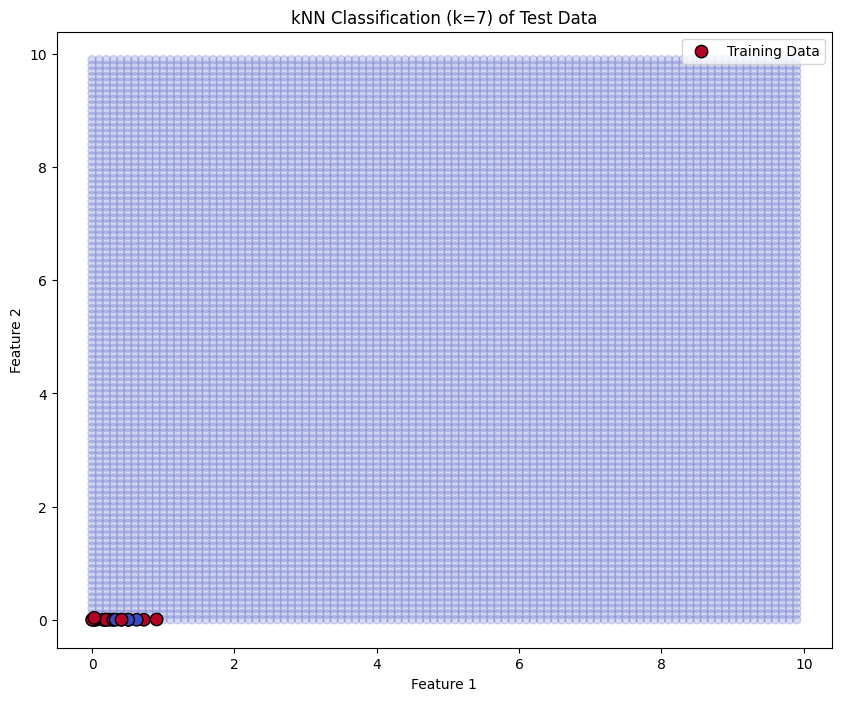

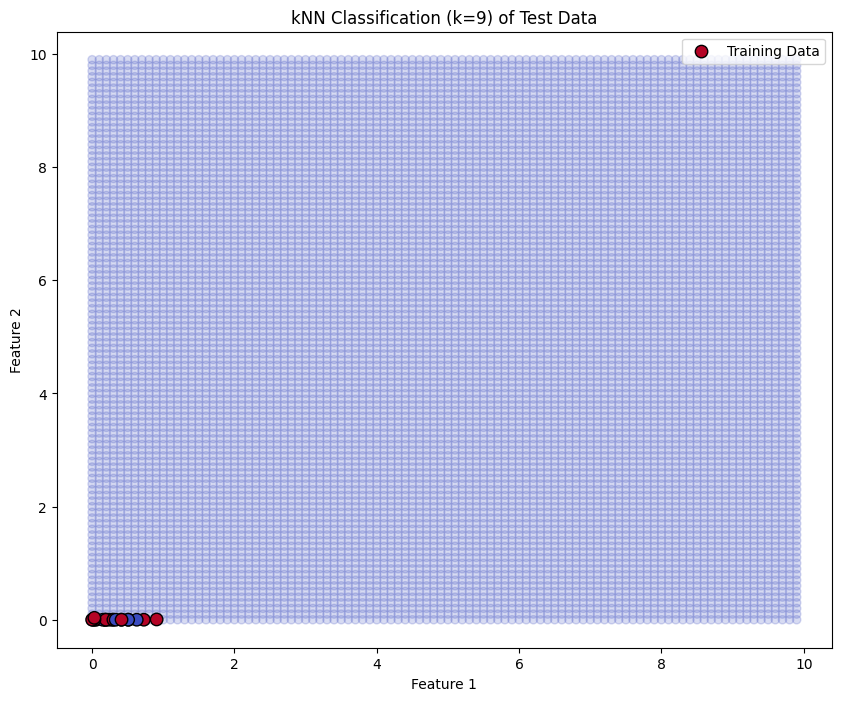

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Function to plot kNN classification
def plot_knn_classification(k, selected_features, selected_labels):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(selected_features, selected_labels)

    # Create meshgrid for test data
    x_values = np.arange(0, 10, 0.1)
    y_values = np.arange(0, 10, 0.1)
    xx, yy = np.meshgrid(x_values, y_values)
    test_data = np.c_[xx.ravel(), yy.ravel()]

    # Predict classes for test data
    predicted_classes = knn.predict(test_data)

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.scatter(test_data[:, 0], test_data[:, 1], c=predicted_classes, cmap=plt.cm.coolwarm, alpha=0.2)
    plt.scatter(selected_features[:, 0], selected_features[:, 1], c=selected_labels, cmap=plt.cm.coolwarm, edgecolor='k', s=80, label='Training Data')
    plt.title(f'kNN Classification (k={k}) of Test Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    # Define selected features and labels (example values)
    selected_features = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
    selected_labels = np.array([0, 1, 0, 1])

    # Define k values
    k_values = [1, 3, 5, 7, 9]

    # Plot kNN classification for each k value
    for k in k_values:
        plot_knn_classification(k, selected_features, selected_labels)


A7. Use RandomSearchCV() or GridSearchCV() operations to find the ideal ‘k’ value for your 
kNN classifier. This is called hyper-parameter tuning.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

def load_data(features_path, labels_path):
    features = np.load(features_path)
    labels = np.load(labels_path)
    return features, labels

def preprocess_data(features, labels):
    indices = np.where((labels == 0) | (labels == 1))
    filtered_features = features[indices]
    filtered_labels = labels[indices]
    X_train, X_test, y_train, y_test = train_test_split(filtered_features, filtered_labels, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

def tune_knn(X_train, y_train):
    param_grid = {'n_neighbors': list(range(1, 30))}
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_knn = grid_search.best_estimator_
    return best_knn

def evaluate_model(model, X_test, y_test):
    test_accuracy = model.score(X_test, y_test)
    return test_accuracy

# Main Program
if __name__ == "__main__":
    # Paths to the features and labels files
    features_path = 'E:\College\SEMESTER 4\MACHINE LEARNING\extracted_features.npy'  
    labels_path = 'E:\College\SEMESTER 4\MACHINE LEARNING\labels.npy' 

    # Load data
    features, labels = load_data(features_path, labels_path)

    # Preprocess data
    X_train, X_test, y_train, y_test = preprocess_data(features, labels)

    # Tune KNN model
    best_knn = tune_knn(X_train, y_train)

    # Evaluate model
    test_accuracy = evaluate_model(best_knn, X_test, y_test)

    # Print results
    print("Best Parameters: ", best_knn.get_params())
    print("Best Score (cross-validated accuracy): ", best_knn.score(X_train, y_train))
    print("Test set accuracy: ", test_accuracy)


Best Parameters:  {'n_neighbors': 7}
Best Score (cross-validated accuracy):  0.8792047819301135
Test set accuracy:  0.868663594470046
